In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torchvision


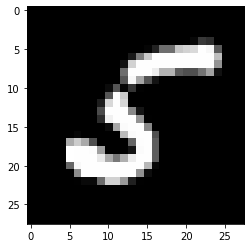

In [2]:
trainset = torchvision.datasets.MNIST(root = '',
                                      train = True,
                                      download=True
                                      )
num_classes = len(trainset.classes)
idx = np.random.randint(trainset.data.shape[0])
img = trainset.data[idx]/255.
plt.imshow(img, cmap = 'gray')
plt.show()

#1.a

In [3]:
class mnistModel(nn.Module):
    def __init__(self, features_in, features_out):
        super(mnistModel, self).__init__()
        self.fc1 = nn.Linear(in_features= features_in ,out_features = 128)
        self.fc2 = nn.Linear(in_features=128 ,out_features = 64)                              
        self.fc3 = nn.Linear(in_features=64 ,out_features = features_out)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        y = F.relu(x)
        return y


# 1.b:

In [12]:
h, w = img.size()
model = mnistModel(h*w, num_classes)
print(model(img[np.newaxis, :]))

tensor([[0.0338, 0.0225, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0584, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)


# LenNet modle

In [13]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, (5,5), padding=2)
        self.conv2 = nn.Conv2d(6, 16, (5,5))
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = nn.
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [109]:
modle = LeNet()
print(modle(img[np.newaxis, np.newaxis, :]))


tensor([[-0.0932,  0.0601, -0.0407, -0.0583, -0.0219,  0.0213,  0.1119,  0.0315,
          0.1368, -0.0353]], grad_fn=<AddmmBackward>)
